In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.2
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

In [4]:
IMAGE_SIZE = [256,256]
CHANNELS = 3
train_path = 'Dataset_8_2/train'
valid_path = 'Dataset_8_2/test'

In [7]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87924736/87910968 [==============================] - 17s 0us/step


In [8]:
for layer in inception.layers:
    layer.trainable = False

In [9]:
folders = glob('Dataset_8_2/train/*')

In [10]:
x = Flatten()(inception.output)

In [11]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [12]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
IMAGE_SIZE = 256
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'Dataset_8_2/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode = 'categorical'
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 601 images belonging to 6 classes.


In [14]:
train_generator.class_indices

{'Alternaria_Leaf_Spot': 0,
 'Cercospora_leaf_spot': 1,
 'Fusarium_Wilt': 2,
 'Healthy_Leaf': 3,
 'Leaf_Spot': 4,
 'Yellow_Mosaic': 5}

In [15]:
class_names = list(train_generator.class_indices.keys())
class_names

['Alternaria_Leaf_Spot',
 'Cercospora_leaf_spot',
 'Fusarium_Wilt',
 'Healthy_Leaf',
 'Leaf_Spot',
 'Yellow_Mosaic']

In [16]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.24012676 0.24404833 0.22444049]
  [0.23797342 0.24189499 0.22228715]
  [0.23582011 0.23974168 0.22013384]
  ...
  [0.3709456  0.37486717 0.35525933]
  [0.47986165 0.48378322 0.4579719 ]
  [0.5869392  0.59291655 0.5677112 ]]

 [[0.255108   0.25902957 0.23942173]
  [0.25603086 0.25995243 0.24034458]
  [0.25695372 0.26087528 0.24126743]
  ...
  [0.37186846 0.37579003 0.3561822 ]
  [0.49524248 0.49916404 0.4724299 ]
  [0.5890925  0.59537745 0.571095  ]]

 [[0.27771962 0.2816412  0.2608069 ]
  [0.2700292  0.27395076 0.25342408]
  [0.26233876 0.26626033 0.24604128]
  ...
  [0.37279132 0.3767129  0.35710505]
  [0.51062334 0.5145449  0.48688787]
  [0.59124583 0.5978384  0.57447875]]

 ...

 [[0.30328563 0.3072072  0.28759935]
  [0.33496782 0.3388894  0.31928155]
  [0.23588116 0.23980273 0.22019489]
  ...
  [0.48570183 0.4896234  0.466094  ]
  [0.48354852 0.4874701  0.46394068]
  [0.48139518 0.48531675 0.46178734]]

 [[0.3078999  0.31182146 0.29221362]
  [0.3257393  0.32966086 0.31005302]


In [17]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'Dataset_8_2/test',
        target_size=(256,256),
        batch_size=32,
        class_mode = 'categorical'
)

Found 149 images belonging to 6 classes.


In [18]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  train_generator,
  validation_data=test_generator ,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator)
)

Epoch 1/20
19/19 [==============================] - 433s 22s/step - loss: 15.1665 - accuracy: 0.2546 - val_loss: 6.6128 - val_accuracy: 0.4161
Epoch 2/20
19/19 [==============================] - 417s 22s/step - loss: 3.2290 - accuracy: 0.6007 - val_loss: 3.8130 - val_accuracy: 0.4832
Epoch 3/20
19/19 [==============================] - 558s 30s/step - loss: 2.0393 - accuracy: 0.6772 - val_loss: 3.6121 - val_accuracy: 0.5503
Epoch 4/20
19/19 [==============================] - 614s 32s/step - loss: 1.5680 - accuracy: 0.7371 - val_loss: 2.7439 - val_accuracy: 0.6040
Epoch 5/20
19/19 [==============================] - 626s 33s/step - loss: 1.0601 - accuracy: 0.8003 - val_loss: 4.2597 - val_accuracy: 0.5369
Epoch 6/20
19/19 [==============================] - 602s 32s/step - loss: 1.3326 - accuracy: 0.7770 - val_loss: 3.4927 - val_accuracy: 0.6174
Epoch 7/20
19/19 [==============================] - 434s 23s/step - loss: 1.0272 - accuracy: 0.8419 - val_loss: 3.8110 - val_accuracy: 0.5638
Epoch

In [20]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [21]:
acc = r.history['accuracy']
val_acc = r.history['val_accuracy']

loss = r.history['loss']
val_loss = r.history['val_loss']

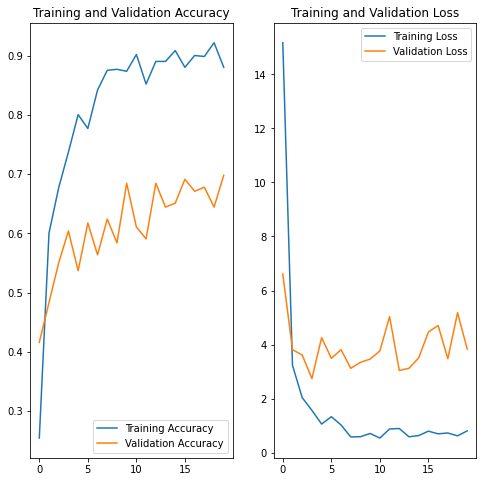

In [22]:
import matplotlib.pyplot as plt
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [23]:
model.save('model_inception.h5')

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

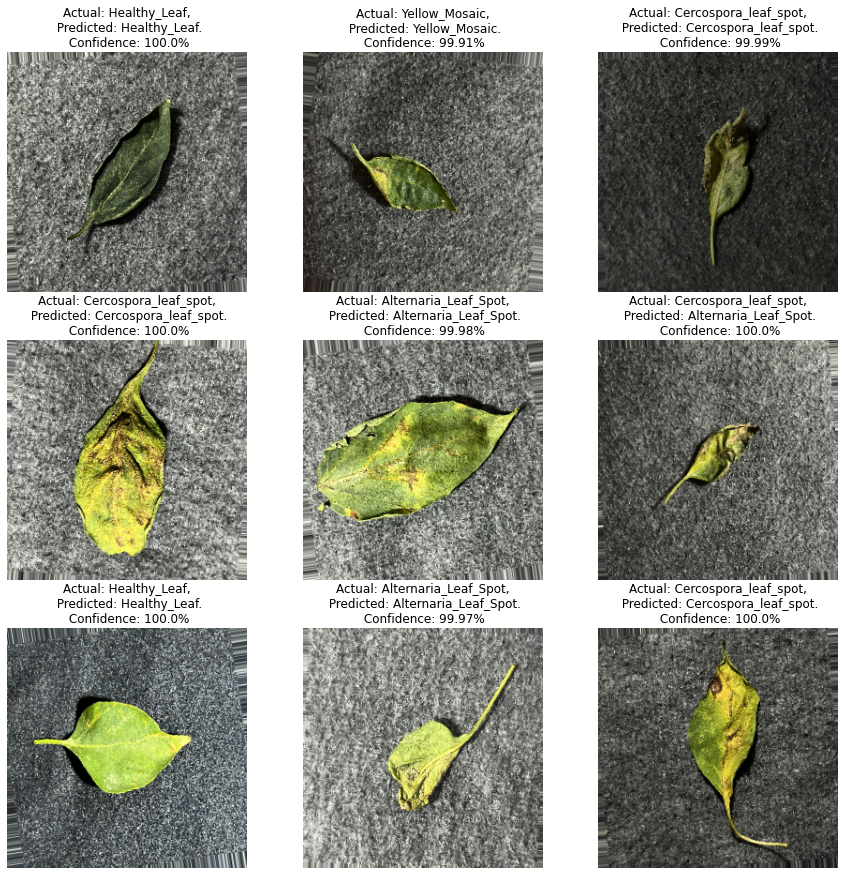

In [26]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break